In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [5]:
df.shape

(209673, 8)

In [6]:
X=df.drop(columns='total_fare')
y=df['total_fare']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std=StandardScaler()

In [10]:
X_train_SD=std.fit_transform(X_train)
X_test_SD=std.transform(X_test)

In [11]:
X_test

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
110587,473.0,2.12,1.0,52.50,0,13.500,0
43371,157.0,0.66,1.0,30.00,15,6.000,0
84310,1862.0,6.71,1.0,157.50,0,6.000,0
160055,1573.0,6.44,1.0,150.00,49,13.250,0
172966,1318.0,4.68,1.0,120.00,0,6.000,0
...,...,...,...,...,...,...,...
1248,671.0,3.51,2.0,75.00,8,33.625,1
48614,2789.0,10.15,1.0,221.25,51,34.200,1
201198,360.0,1.38,1.0,45.00,13,5.750,0
194357,2077.0,10.30,1.0,202.50,0,34.125,1


In [12]:
y_test

110587     66.000
43371      51.000
84310     163.500
160055    212.250
172966    126.000
           ...   
1248      116.625
48614     306.450
201198     63.750
194357    236.625
183327     43.500
Name: total_fare, Length: 41935, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
lr.fit(X_train_SD,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test_SD)

In [16]:
y_pred_train=lr.predict(X_train_SD)

### Model Evalution

In [17]:
print("Coef:",lr.coef_)
print("#"*60)
print("Intercept:",lr.intercept_)

Coef: [-1.13360348e-14  0.00000000e+00  1.33226763e-15  8.53625881e+01
  2.05049287e+01  1.25501560e+01  3.37507799e-14]
############################################################
Intercept: 127.66385866649178


In [18]:
## for training R2 , MSE , MAE
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2 score",r2_score(y_train,y_pred_train))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("MAE",np.sqrt(mean_absolute_error(y_train,y_pred_train)))

R2 score 1.0
RMSE 8.591931578483204e-14
MAE 2.669987948302831e-07


In [19]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 score 1.0
RMSE 8.521337840465912e-14
MAE 2.6669904759635784e-07


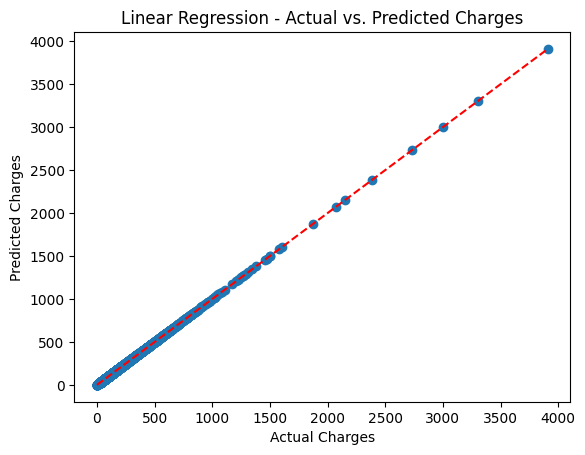

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()

In [21]:
import numpy as np


new_data = pd.DataFrame({
    'trip_duration': [3614],
    'distance_traveled': [33.72],
    'num_of_passengers': [337.5],
    'fare': [1],
    'tip': [337.5],
    'miscellaneous_fees': [2.25],
    'total_fare': [0],  #predicted placeholder
    'surge_applied': [0]
})


X_new = new_data.drop(columns='total_fare')
y_new_placeholder = new_data['total_fare']

# StandardScaler 
X_new_SD = std.transform(X_new)

# Predict the total fare
y_pred_new = lr.predict(X_new_SD)

# Update the predicted placeholder with the predicted total fare
new_data['total_fare'] = y_pred_new


print(new_data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied']])


   trip_duration  distance_traveled  num_of_passengers  fare    tip  \
0           3614              33.72              337.5     1  337.5   

   miscellaneous_fees  total_fare  surge_applied  
0                2.25      340.75              0  


## Ridge regression

In [22]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=10)

In [23]:
R.fit(X_train_SD,y_train)

Ridge(alpha=10)

In [24]:
y_pred_r=R.predict(X_test_SD)

In [25]:
print("R2 score",r2_score(y_test,y_pred_r))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_r)))
print("MAE",np.sqrt(mean_absolute_error(y_test,y_pred_r)))

R2 score 0.9999999972150588
RMSE 0.0052835128771773696
MAE 0.05472261670388712


In [26]:
# Ridge Regression
print(R.coef_)
print("##########")
print(R.intercept_)

[7.82681781e-04 1.60080399e-04 6.92611486e-05 8.53571312e+01
 2.05050309e+01 1.25506975e+01 3.61766654e-04]
##########
127.66385866649178


In [27]:
#testing rendom data
import numpy as np


new_data = pd.DataFrame({
    'trip_duration': [2789.0],
    'distance_traveled': [10.15],
    'num_of_passengers': [1.0],
    'fare': [221.25],
    'tip': [51],
    'miscellaneous_fees': [34.200],
    'total_fare': [0],  #predicted placeholder
    'surge_applied': [1]
})


X_new = new_data.drop(columns='total_fare')
y_new_placeholder = new_data['total_fare']

# StandardScaler 
X_new_SD = std.transform(X_new)

# Predict the total fare
y_pred_new = R.predict(X_new_SD)

# Update the predicted placeholder with the predicted total fare
new_data['total_fare'] = y_pred_new


print(new_data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied']])


   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0         2789.0              10.15                1.0  221.25   51   

   miscellaneous_fees  total_fare  surge_applied  
0                34.2  306.444058              1  


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)

lasso_reg.fit(X_train_SD,y_train)
y_lass_pred=lasso_reg.predict(X_test_SD)

In [29]:
print("R2 score",r2_score(y_test,y_lass_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_lass_pred)))
print("MAE",np.sqrt(mean_absolute_error(y_test,y_lass_pred)))

R2 score 0.99999810048362
RMSE 0.13798639826308293
MAE 0.30888163767423876


In [30]:
# Lasso Regression
print(lasso_reg.coef_)
print("##########")
print(lasso_reg.intercept_)

[ 0.          0.          0.         85.29754842 20.44458118 12.48861172
  0.        ]
##########
127.66385866649178


In [31]:
# we can remove some column like: trip_duration , distance_traveled , num_of_passengers ,surge_applied 
# Because Above column coefficien value is 0  

In [32]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [33]:
columns_to_remove = ['total_fare', 'trip_duration', 'distance_traveled', 'num_of_passengers', 'surge_applied']
X_new = df.drop(columns=columns_to_remove)
y_new=df['total_fare']
from sklearn.model_selection import train_test_split
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y_new,test_size=0.2, random_state=42)

### scaling

In [34]:
X_train_SD_new=std.fit_transform(X_train_new)
X_test_SD_new=std.transform(X_test_new)

In [35]:
# After remove unwanted column , we created Model 
lasso_reg_new=Lasso(alpha=0.1)

lasso_reg_new.fit(X_train_SD_new,y_train_new)
y_lass_pred_new=lasso_reg_new.predict(X_test_SD_new)

In [36]:
print("R2 score",r2_score(y_test_new,y_lass_pred_new))
print("RMSE",np.sqrt(mean_squared_error(y_test_new,y_lass_pred_new)))
print("MAE",np.sqrt(mean_absolute_error(y_test_new,y_lass_pred_new)))

R2 score 0.9999980857523383
RMSE 0.13852042646809956
MAE 0.3092370703163419


In [37]:
#Lasso Regression(after removwe unwanted)
print(lasso_reg_new.coef_)
print("##########")
print(lasso_reg_new.intercept_)

[85.29831538 20.44259301 12.48901356]
##########
127.66385866649178
